In [1]:
#pip install seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

print('Imports complete.')

Imports complete.


In [3]:
#pip install scikit-learn

In [4]:

df = pd.read_csv("Gta.csv")

print('Data loaded successfully. Data shape:', df.shape)

Data loaded successfully. Data shape: (50, 8)


In [5]:

df_clean = df.copy()

# Preview the data before cleaning
print('Preview of data before cleaning:')
print(df_clean.head())

# Define a function to clean the Price column
def clean_price(series):
    """
    Remove currency symbols ($), commas, and extra spaces from a price series then convert to numeric.
    """
    # Remove $ sign and commas, then trim spaces
    series_clean = series.replace({'\$': '', ',': ''}, regex=True).str.strip()
    return pd.to_numeric(series_clean, errors='coerce')

# Define a function to convert lap time from mm:ss.ss format to seconds as a float
def convert_lap_time(series):
    """
    Convert lap time strings in the format 'm:ss.ss' to total seconds as a float.
    If the format is unexpected, attempt a direct conversion.
    """
    def parse_time(x):
        try:
            if ':' in x:
                minutes, seconds = x.split(":")
                return float(minutes) * 60 + float(seconds)
            else:
                return float(x)
        except Exception as e:
            # Log error if needed and return NaN
            return np.nan
    return series.apply(parse_time)

# Clean 'Price (GTA$)'
df_clean['Price (GTA$)'] = clean_price(df_clean['Price (GTA$)'])

# Clean 'Lap Time (Seconds)' by converting it to actual seconds
df_clean['Lap Time (Seconds)'] = convert_lap_time(df_clean['Lap Time (Seconds)'])

# Convert 'Top Speed (mph)' to numeric (if not already numeric)
df_clean['Top Speed (mph)'] = pd.to_numeric(df_clean['Top Speed (mph)'], errors='coerce')

# Drop rows with missing values in critical columns
df_clean = df_clean.dropna(subset=['Price (GTA$)', 'Lap Time (Seconds)', 'Top Speed (mph)'])

print('Data shape after cleaning:', df_clean.shape)

# Sanity check to ensure we have enough data
if df_clean.empty:
    raise ValueError('The cleaned data frame is empty. Please check the cleaning steps and the data file format.')

Preview of data before cleaning:
   Rank Vehicle Name Manufacturer Vehicle Class Price (GTA$)  Top Speed (mph)  \
0     1      Krieger   Benefactor         Super   $2,875,000           127.25   
1     2       Emerus       Progen         Super   $2,750,000           127.25   
2     3    Itali GTO       Grotti        Sports   $1,965,000           127.75   
3     4  Buffalo EVX      Bravado        Muscle   $2,140,000           124.50   
4     5       Vagner   Dewbauchee         Super   $1,535,000           126.75   

  Lap Time (Seconds) DLC / Release Update  
0            0:59.27       Diamond Casino  
1            0:58.29       Diamond Casino  
2            0:59.72            Arena War  
3            1:03.46    San Andreas Mercs  
4            0:59.19           Gunrunning  
Data shape after cleaning: (39, 8)


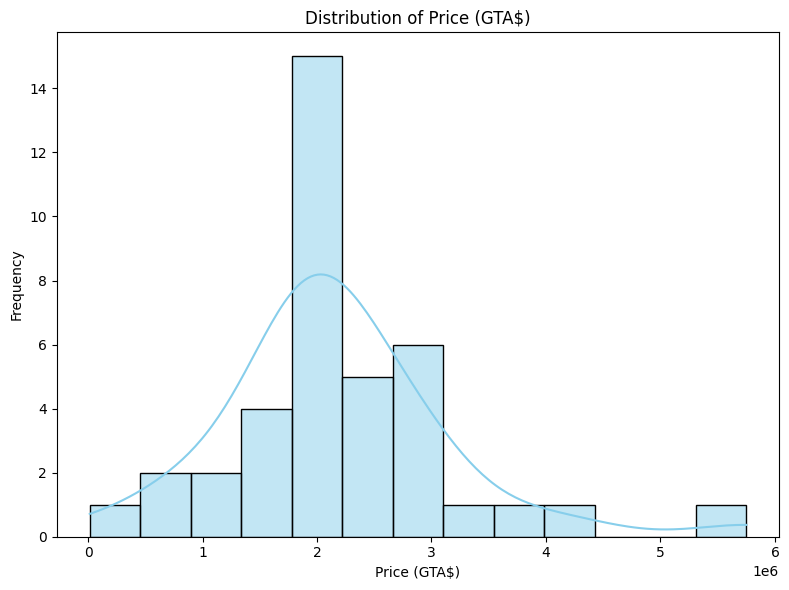

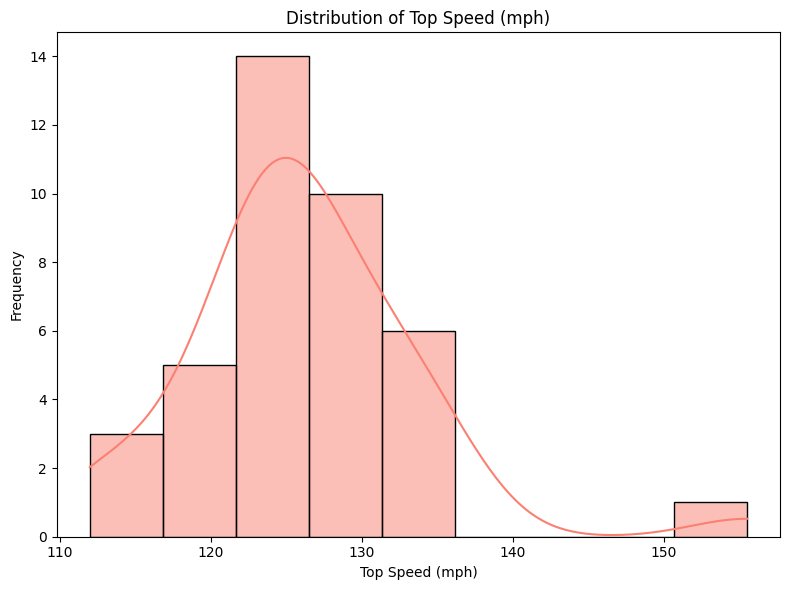

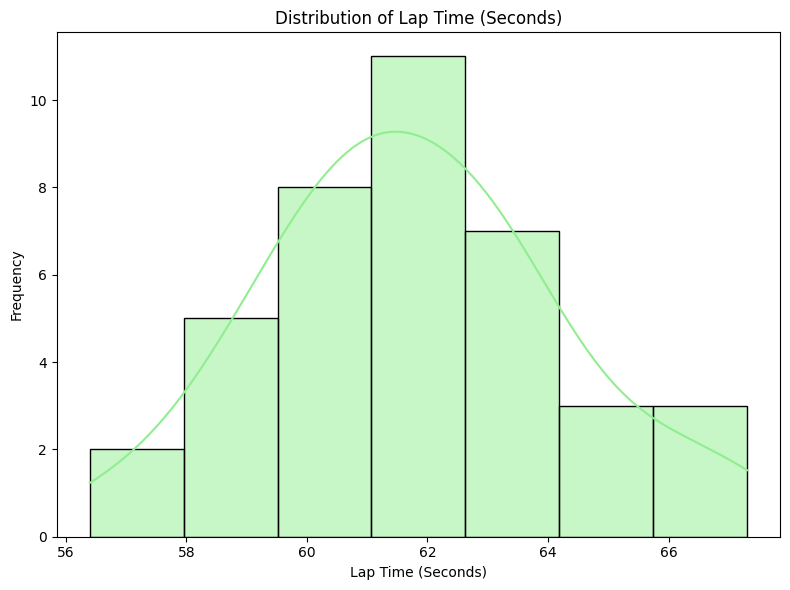

In [6]:

# Histogram for Price (GTA$)
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Price (GTA$)'], kde=True, color='skyblue')
plt.title('Distribution of Price (GTA$)')
plt.xlabel('Price (GTA$)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram for Top Speed (mph)
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Top Speed (mph)'], kde=True, color='salmon')
plt.title('Distribution of Top Speed (mph)')
plt.xlabel('Top Speed (mph)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram for Lap Time (Seconds)
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Lap Time (Seconds)'], kde=True, color='lightgreen')
plt.title('Distribution of Lap Time (Seconds)')
plt.xlabel('Lap Time (Seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

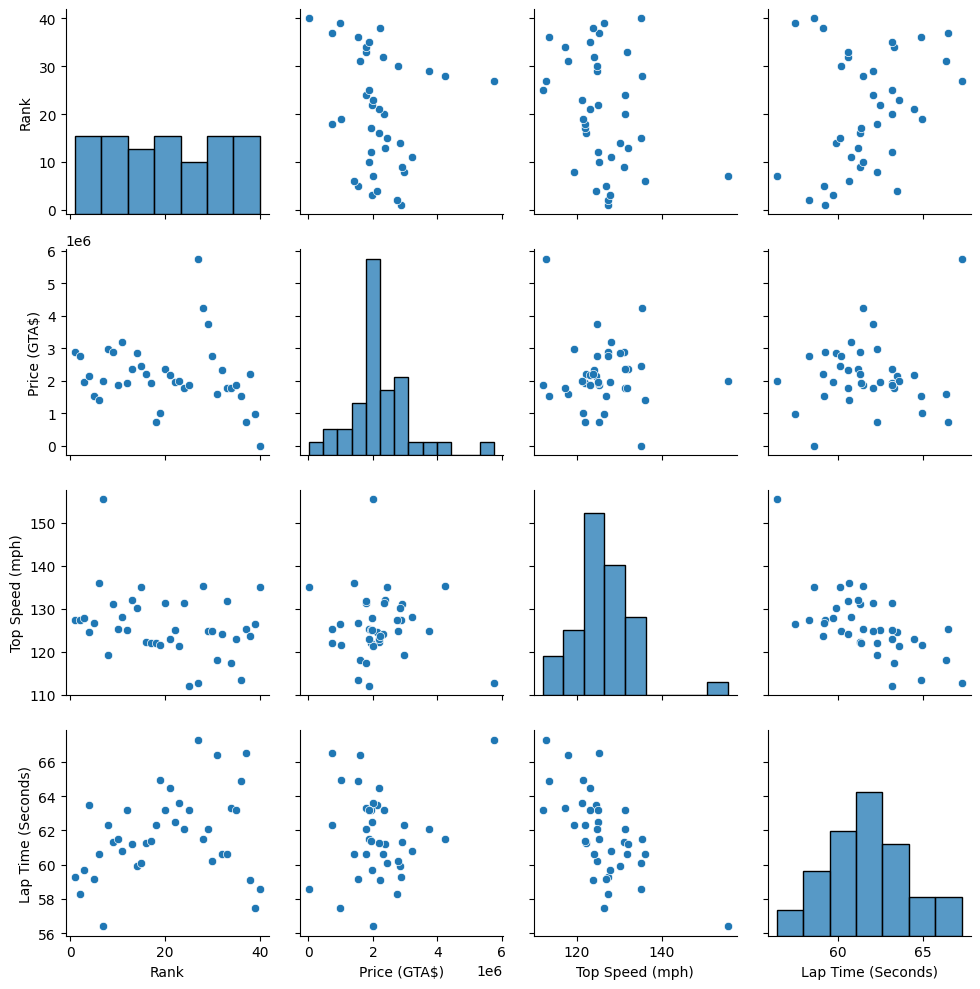

In [7]:
# Pair Plot to inspect relationships among numeric variables
numeric_df = df_clean[['Rank', 'Price (GTA$)', 'Top Speed (mph)', 'Lap Time (Seconds)']]
sns.pairplot(numeric_df)
plt.tight_layout()
plt.show()

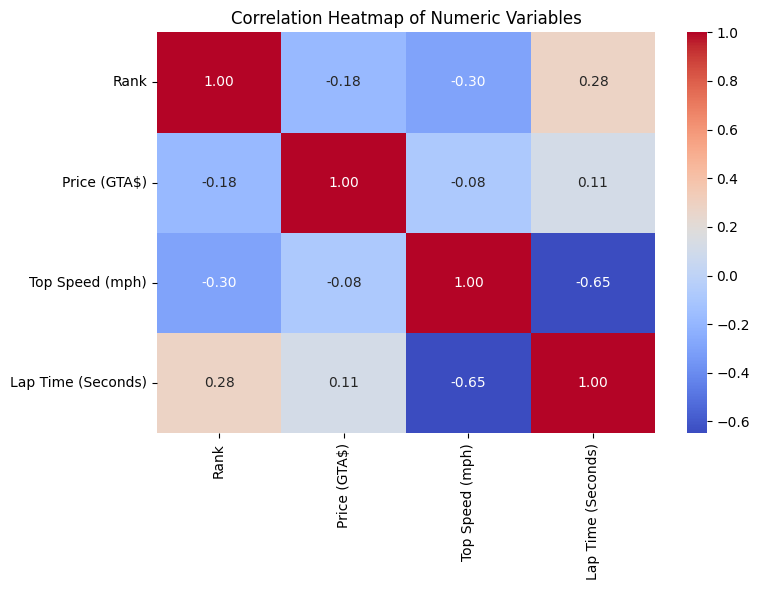

In [8]:
# Correlation Heatmap (Only if there are four or more numeric columns)
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()

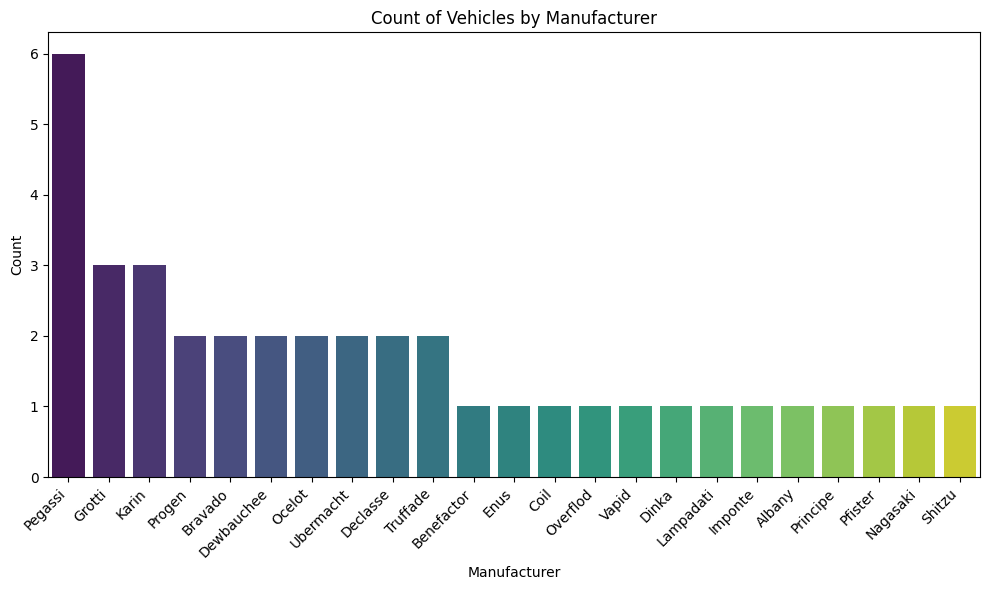

In [9]:

# Countplot for Manufacturers to see vehicle distribution by manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Manufacturer', order=df_clean['Manufacturer'].value_counts().index, palette='viridis')
plt.title('Count of Vehicles by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

R2 score for the Lap Time prediction model: -0.3275998392684296


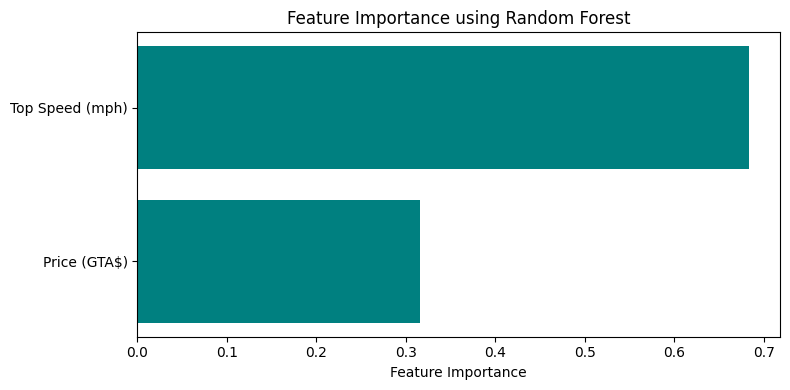

In [10]:
# Define features and target variable
features = ['Price (GTA$)', 'Top Speed (mph)']
target = 'Lap Time (Seconds)'

X = df_clean[features]
y = df_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model using the R2 score
score = r2_score(y_test, predictions)
print('R2 score for the Lap Time prediction model:', score)

# For further insights, one could implement feature importance visualizations
importances = model.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.tight_layout()
plt.show()